In [16]:
!pip install underthesea
!pip install langdetect
!pip install emoji
!pip install git+https://github.com/chienthan2vn/vietnamese-preprocess.git
!pip install transformers
!pip install googletrans==4.0.0-rc1
!pip install underthesea[deep]



  Cloning https://github.com/chienthan2vn/vietnamese-preprocess.git to /tmp/pip-req-build-you1m6i_
  Running command git clone --filter=blob:none --quiet https://github.com/chienthan2vn/vietnamese-preprocess.git /tmp/pip-req-build-you1m6i_
  Resolved https://github.com/chienthan2vn/vietnamese-preprocess.git to commit c3d082eb632653f55edf658965fa055518a47f08
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of underthesea[deep] to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of underthesea[deep] to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
#PIPELINE XỬ LÍ
# def preprocessing_pipeline(text):
#     text = remove_emojis(text)                   # B1: Loại emoji/icon
#     text = normalize_repeated_chars(text)        # B2: Chuẩn hóa từ bị kéo dài
#     text = replace_teencode_and_en(text)         # B3: Thay teencode
#     predictions = corrector(texts, max_length=MAX_LENGTH)  #B4: Chỉnh lỗi chính tả các từ
#     text = remove_gibberish(text)                # B5: Loại từ vô nghĩa
#                                                  #B6: Đổi lại các từ tiếng anh -> tiếng việt, bỏ các từ không phải tiếng việt (tạm bỏ)
#     text = underthesea.word_tokenize(text)       # B7: Tách từ
#     return " ".join(text)


In [3]:
test_dataset = '/content/drive/MyDrive/Colab Notebooks/LabNLP/cuoi ky/data/data_test.csv'
train_dataset = '/content/drive/MyDrive/Colab Notebooks/LabNLP/cuoi ky/data/data_train.csv'
val_dataset = '/content/drive/MyDrive/Colab Notebooks/LabNLP/cuoi ky/data/data_val.csv'

In [4]:
import pandas as pd
import re
from underthesea import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv(train_dataset)
train_data = train['data']
test = pd.read_csv(test_dataset)
test_data = test['data']
val = pd.read_csv(val_dataset)
val_data = val['data']

In [ ]:
print(len(train))
print(len(test))
print(len(val))

12981
1623
1623


In [ ]:
train

,data,stayingpower,texture,smell,price,others,colour,shipping,packing
0,"son đẹp lăm,sẽ ủng hộ tiếp , shipper cũng dễ t...",NaN,NaN,NaN,NaN,NaN,NaN,positive,NaN
1,Son đẹp lắm nha mn tuy là son nội địa giá rẻ n...,NaN,positive,positive,positive,NaN,NaN,NaN,NaN
2,"Son màu lên chuẩn, đẹp tuy nhiên dễ khô nên cầ...",NaN,negative,NaN,NaN,NaN,positive,NaN,NaN
3,Công dụng: rất đẹp\nKết cấu: tốt\nĐộ bền màu: ...,positive,positive,NaN,NaN,NaN,positive,NaN,NaN
4,"Hàng gói siêu chắc chắn, packing xinh xỉu, đủ ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,positive
...,...,...,...,...,...,...,...,...,...
12976,"Sieu xinhh, bên phải là son mafick, bên trái l...",NaN,NaN,NaN,NaN,neutral,NaN,NaN,NaN
12977,"Đóng gói cẩn thận, hàng giao nhanh, chưa dùng ...",NaN,NaN,NaN,NaN,NaN,NaN,positive,positive
12978,Son có mùi lạ lạ sao í. Lúc bôi lên môi cảm th...,NaN,negative,negative,NaN,NaN,NaN,NaN,NaN
12979,"Giao hàng nhanh, Son đặt thứ 7 đến thứ 2 giao ...",negative,NaN,NaN,NaN,NaN,NaN,positive,NaN


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LabNLP/cuoi ky/data/full_data.csv")

# Danh sách các aspect (bỏ cột 'data')
aspects = df.columns.tolist()
aspects.remove('data')

==> Train


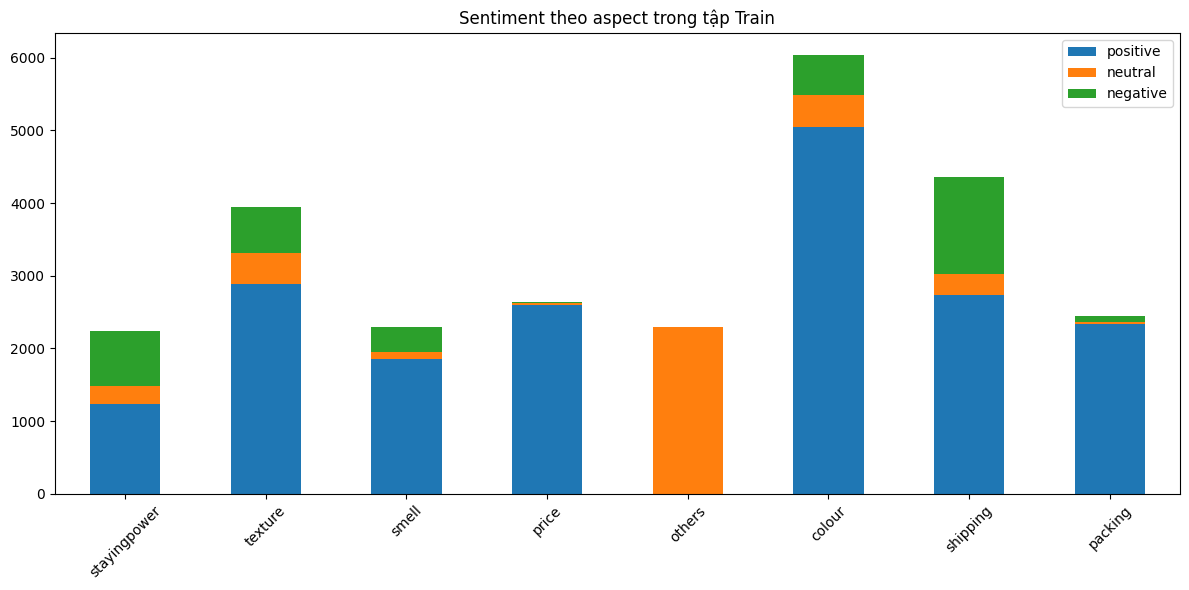

==> Validation


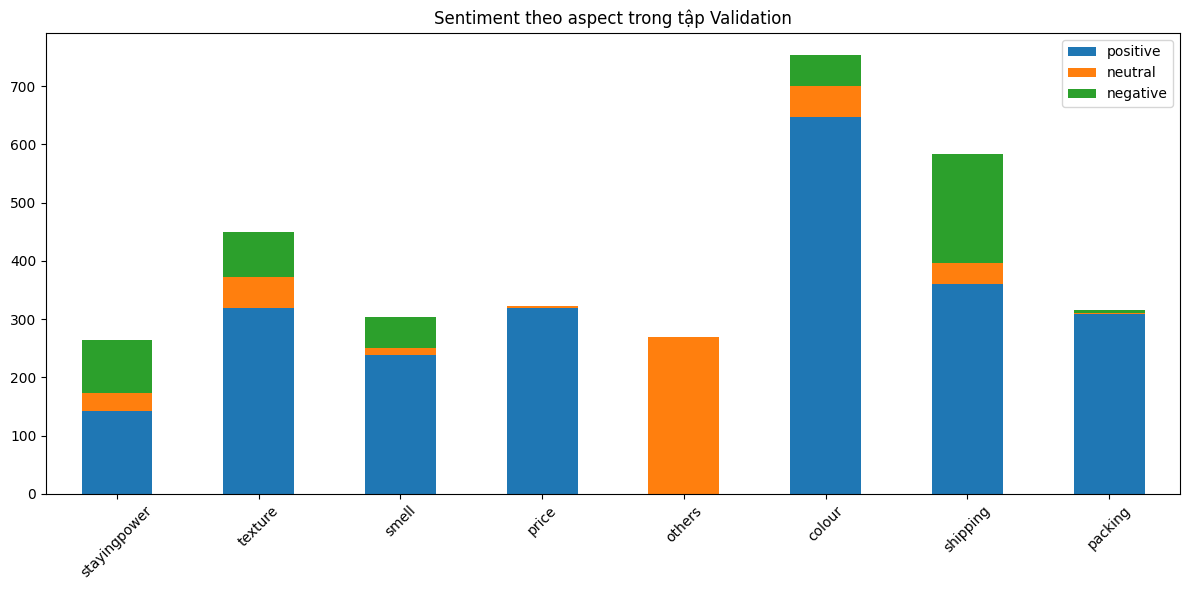

==> Test


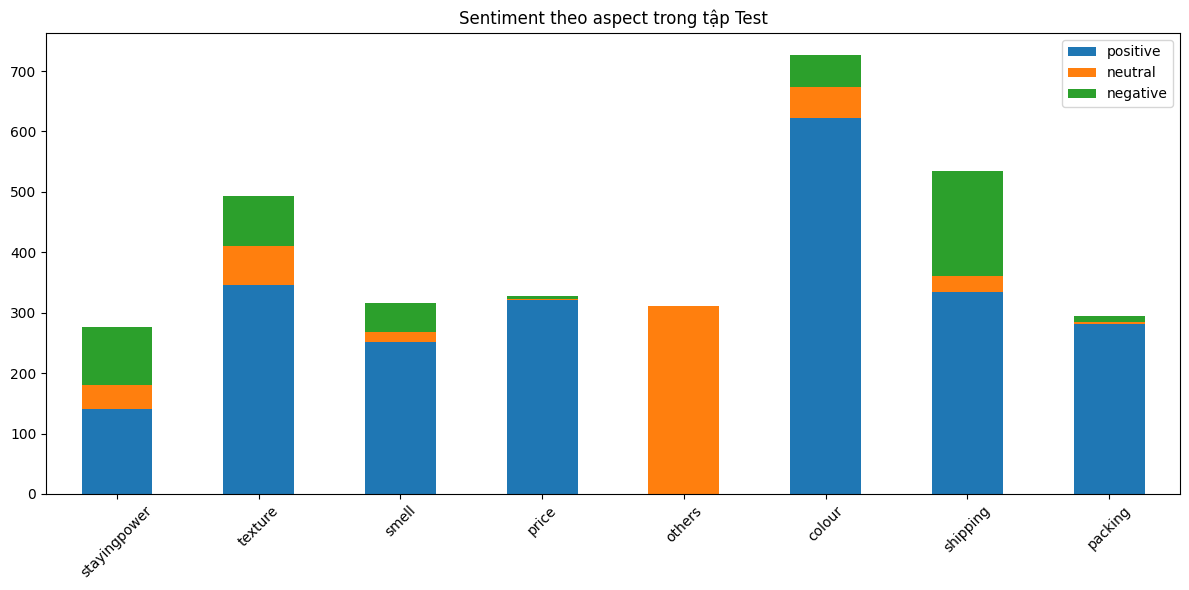

In [ ]:
for name, dataset in zip(['Train', 'Validation', 'Test'], [train, val, test]):
    print(f"==> {name}")
    counts = {aspect: dataset[aspect].value_counts() for aspect in aspects}
    df_sent = pd.DataFrame(counts).fillna(0).T
    df_sent[['positive', 'neutral', 'negative']].plot(kind='bar', stacked=True, figsize=(12,6))
    plt.title(f"Sentiment theo aspect trong tập {name}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

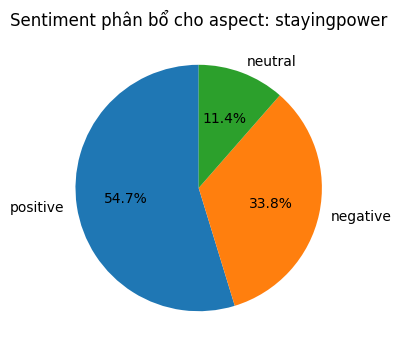

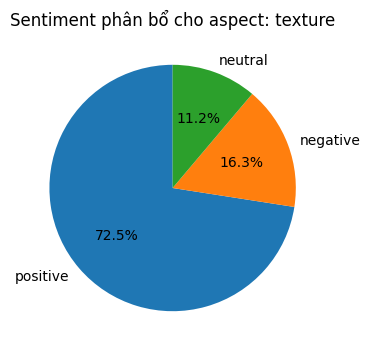

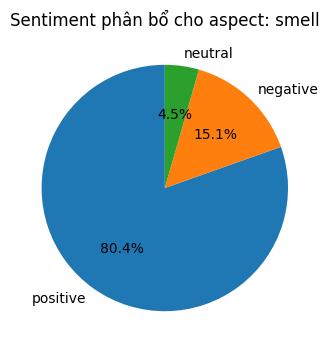

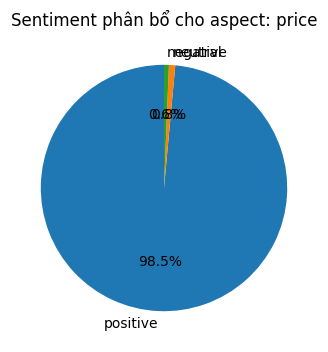

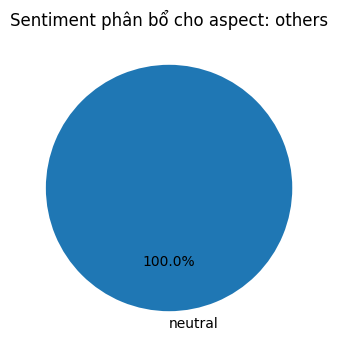

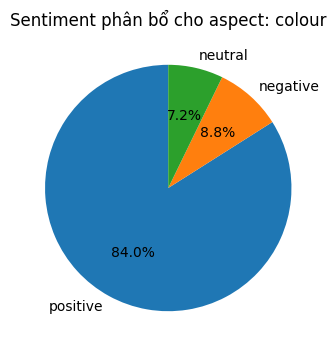

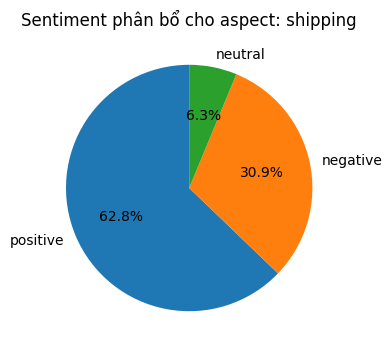

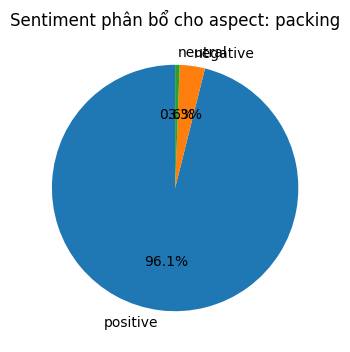

In [ ]:
for aspect in aspects:
    counts = df[aspect].value_counts()
    plt.figure(figsize=(4,4))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f"Sentiment phân bổ cho aspect: {aspect}")
    plt.show()


In [ ]:
train_data.to_csv('train.csv', index=False)
test_data.to_csv('test.csv', index=False)
val_data.to_csv('val.csv', index=False)

# Loại bỏ emoji

In [ ]:
import emoji
# Hàm xóa emoji khỏi chuỗi
def remove_emojis(text):
    if isinstance(text, str):
        return emoji.replace_emoji(text, replace='')
    return text  # Tránh lỗi nếu giá trị không phải chuỗi

# Hàm xử lý cột 'data' của DataFrame
def clean_dataframe_emojis(df, df_type):
    df = df.copy()
    before_emoji = df['data'].copy()
    df['data'] = df['data'].apply(remove_emojis)
    # So sánh
    changed_emoji = df[before_emoji != df['data']].index.tolist()
    # Lưu ra file
    with open(f"changed_index_emoji_{df_type}.txt", "w", encoding="utf-8") as f:
        for idx in changed_emoji:
            f.write(str(idx) + "\n")
    return df

#Test
text = "Hình ảnh minh hoạ 🌸🌸💕🌸💕🌸💕🌸💕🌸💕😳💕🌸💕🌸🌸💕🌸🌸💕🌸🌸🌸🌸🌸🌸"
cleaned_text = remove_emojis(text)
print(cleaned_text)

Hình ảnh minh hoạ 


In [ ]:
clean_emoji_df_train = clean_dataframe_emojis(train, 'train')
clean_emoji_df_test = clean_dataframe_emojis(test, 'test')
clean_emoji_df_val = clean_dataframe_emojis(val, 'val')

In [ ]:
print(len(clean_emoji_df_train))
print(len(clean_emoji_df_test))
print(len(clean_emoji_df_val))

12981
1623
1623


In [ ]:
clean_emoji_df_train.to_csv('train_emoji_clean.csv', index=False)


Đánh giá: Đã lọc được hết các emoji, tuy nhiên các emoji gõ tay như: :))), ^_^,... Vẫn chưa được lọc

# Chuẩn hóa từ kéo dài

In [ ]:
import re

def normalize_repeated_chars(text):
    if isinstance(text, str):
        # (\w)\1{2,} → ký tự lặp lại ít nhất 3 lần → giữ lại 1 lần
        return re.sub(r'(\w)\1{2,}', r'\1', text)
    return text

def normalize_repeated_chars_df(df, df_type):
    df = df.copy()
    before_long = df['data'].copy()
    df['data'] = df['data'].apply(normalize_repeated_chars)
    # So sánh
    changed_long = df[before_long != df['data']].index.tolist()
    # Lưu ra file
    with open(f"changed_index_long_{df_type}.txt", "w", encoding="utf-8") as f:
        for idx in changed_long:
            f.write(str(idx) + "\n")
    return df

#Test
text = "Đẹp son lì ..................aaaaaaaaaaaaaaaaaaaaaaaaa, Son xinh mịn môi giao hàng nhanh vỏ son cũng xinh okkkkkkkkkkkkkkkk mình test theo thứ tự nha"
cleaned_text = normalize_repeated_chars(text)
print(cleaned_text)

Đẹp son lì ..................a, Son xinh mịn môi giao hàng nhanh vỏ son cũng xinh ok mình test theo thứ tự nha


In [ ]:
text = 'son rẻ nên đánh chơi thôi mà cũng đẹpggffggffffgggggggggggggg'
cleaned_text = normalize_repeated_chars(text)
print(cleaned_text)

son rẻ nên đánh chơi thôi mà cũng đẹpggffggfg


In [ ]:
# Áp dụng hàm xử lý
clean_long_df_train = normalize_repeated_chars_df(clean_emoji_df_train, 'train')
clean_long_df_test = normalize_repeated_chars_df(clean_emoji_df_test, 'test')
clean_long_df_val = normalize_repeated_chars_df(clean_emoji_df_val, 'val')

In [ ]:
print(len(clean_long_df_train))
print(len(clean_long_df_test))
print(len(clean_long_df_val))
clean_long_df_train.to_csv('train_long_clean.csv', index=False)

12981
1623
1623


Đánh giá: phần này ổn, đúng như mong muốn
Tuy có 1 số cái ngoài tầm như:
*   ạaaaaaaaaaaaaaaaaa -> ạa
*   íiiiiiiii -> íi

---


Không quan trọng lắm vì sau đó cũng sẽ
được lọc đi




# Thay teencode, và 1 số từ tiếng anh

In [ ]:
from vnpreprocess.utils.process import preprocessing, special_character
from tqdm import tqdm
#special_character dùng để bỏ ?/><,... đặc biệt là những emoji dạng chữ như :)), :((

def preprocess_teencode(text):
    """
    Xử lý teencode, từ viết tắt, tiếng Anh, chuẩn hóa unicode, dấu câu,...
    """
    if isinstance(text, str):

        return preprocessing(special_character(text))
    return text

def clean_teencode(df, df_type):
    df = df.copy()
    before = df['data'].copy()

    tqdm.pandas(desc="Đang xử lý teencode")
    df['data'] = df['data'].apply(preprocess_teencode)

    # Ghi lại chỉ số dòng thay đổi
    changed_idx = df[before != df['data']].index.tolist()

    # Ghi log index ra file
    with open(f"changed_index_teencode_{df_type}.txt", "w", encoding="utf-8") as f:
        for idx in changed_idx:
            f.write(str(idx) + "\n")

    return df
#Test
text = "T thik cks đá bóng vào mỗi buổi chiều (6h45) vs bb:>>>."
cleaned_text = preprocess_teencode(text)
print(cleaned_text)

tao thích chơi đá bóng vào mỗi buổi chiều 6h45 với bạn bè


In [ ]:
# Áp dụng hàm xử lý
clean_teencode_df_train = clean_teencode(clean_long_df_train, 'train')
clean_teencode_df_test = clean_teencode(clean_long_df_test, 'test')
clean_teencode_df_val = clean_teencode(clean_long_df_val, 'val')

In [ ]:
clean_teencode_df_train.to_csv('train_teencode_clean.csv', index=False)
clean_teencode_df_test.to_csv('test_teencode_clean.csv', index=False)
clean_teencode_df_val.to_csv('val_teencode_clean.csv', index=False)

# Chỉnh chính tả

In [ ]:
from transformers import pipeline

corrector = pipeline("text2text-generation", model="bmd1905/vietnamese-correction-v2")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/961 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.58G [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

dict.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/279 [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
from transformers import pipeline, logging
from tqdm import tqdm
logging.set_verbosity_error()  # Ẩn các warning từ transformers
# Khởi tạo pipeline từ mô hình correction
corrector = pipeline("text2text-generation", model="bmd1905/vietnamese-correction-v2")
MAX_LENGTH = 512
def correct_texts(texts, batch_size=4):
    """
    Nhận danh sách các văn bản, trả về danh sách văn bản đã được sửa lỗi chính tả.
    """
    corrected_texts = []
    num_batches = (len(texts) + batch_size - 1) // batch_size

    for i in tqdm(range(0, len(texts), batch_size), total=num_batches, desc="Đang sửa văn bản"):
        batch = texts[i:i+batch_size]
        preds = corrector(batch, max_length=MAX_LENGTH)
        for text, pred in zip(texts, preds):
            corrected_texts.append(pred['generated_text'])
    return corrected_texts



In [ ]:
def correct_dataframe(df,df_type, column="data"):
    df = df.copy()
    before = df['data'].copy()
    original_texts = df[column].fillna("").tolist()
    df = df.drop(columns=[column])
    corrected = correct_texts(original_texts)
    df[column] = corrected

    changed_idx = df[before != df['data']].index.tolist()
    with open(f"changed_index_correction_{df_type}.txt", "w", encoding="utf-8") as f:
        for idx in changed_idx:
            f.write(str(idx) + "\n")

    return df


In [ ]:
#Test
text = ["toi dang là sinh diên nam hai ở truong đạ hoc khoa jọc tự nhiên , trogn năm ke tiep toi sẽ chọn chuyen nganh về trí tue nhana tạo"]
cleaned_text = correct_texts(text)
print(cleaned_text)

Đang sửa văn bản: 100%|██████████| 1/1 [00:01<00:00,  1.83s/it]

['Tôi đang là sinh viên năm hai ở trường đại học khoa học tự nhiên , trong năm kế tiếp tôi sẽ chọn chuyên ngành về trí tuệ nhân tạo.']


In [ ]:
df_test = pd.DataFrame({"data": text})
pd.set_option('display.max_colwidth', None)
df_clean = correct_dataframe(df_test, 'test')
print(df_clean)

Đang sửa văn bản: 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

                                                                                                                                 data
0  Tôi đang là sinh viên năm hai ở trường đại học khoa học tự nhiên , trong năm kế tiếp tôi sẽ chọn chuyên ngành về trí tuệ nhân tạo.


In [ ]:
clean_teencode_df_train = pd.read_csv('train_teencode_clean.csv')
clean_teencode_df_test = pd.read_csv('test_teencode_clean.csv')
clean_teencode_df_val = pd.read_csv('val_teencode_clean.csv')

In [ ]:
# Áp dụng hàm xử lý
clean_correction_df_train = correct_dataframe(clean_teencode_df_train, 'train')
clean_correction_df_test = correct_dataframe(clean_teencode_df_test, 'test')
clean_correction_df_val = correct_dataframe(clean_teencode_df_val, 'val')

Đang sửa văn bản: 100%|██████████| 406/406 [11:39<00:00,  1.72s/it]


In [ ]:
clean_correction_df_train.to_csv('train_correction_clean.csv', index=False)
clean_correction_df_test.to_csv('test_correction_clean.csv', index=False)
clean_correction_df_val.to_csv('val_correction_clean.csv', index=False)

# Loại bỏ từ vô nghĩa

In [5]:
clean_correction_df_train = pd.read_csv('train_correction_clean.csv')
clean_correction_df_test = pd.read_csv('test_correction_clean.csv')
clean_correction_df_val = pd.read_csv('val_correction_clean.csv')

In [6]:
import re
from underthesea import word_tokenize

import re
from underthesea import word_tokenize

def is_valid_word(word):
    # Kiểm tra từ chỉ chứa chữ cái hoặc chữ số (bỏ qua _), độ dài hợp lệ
    cleaned_word = word.replace("_", "")
    # Chấp nhận từ chứa chữ cái, chữ số, hoặc kết hợp (loại bỏ ký tự đặc biệt khác)
    return bool(re.match(r'^[\w]+$', cleaned_word, re.UNICODE)) and 1 <= len(word) <= 10

def remove_gibberish_from_sentence(text, gibberish_threshold=0.6):
    if not isinstance(text, str):
        return text

    # Tiền xử lý: loại bỏ ký tự đặc biệt (trừ _, chữ, số, dấu cách)
    text = re.sub(r'[^\w\s_]', ' ', text)

    # Tokenize bằng underthesea
    words = word_tokenize(text, format="text").split()
    total = len(words)
    if total == 0:
        return ""

    # Đếm số từ không hợp lệ
    invalid_words = [w for w in words if not is_valid_word(w)]
    invalid_ratio = len(invalid_words) / total

    # Nếu tỷ lệ từ không hợp lệ vượt ngưỡng → trả về None
    if invalid_ratio >= gibberish_threshold:
        return None

    # Lọc từ hợp lệ và thay _ bằng dấu cách
    cleaned_words = [w.replace("_", " ") for w in words if is_valid_word(w)]
    return " ".join(cleaned_words)

def remove_gibberish_df(df):
    df = df.copy()
    df['data'] = df['data'].apply(remove_gibberish_from_sentence)
    # Option: bỏ dòng rỗng
    #df = df[df['data'].notna() & (df['data'].str.strip() != '')]
    return df

text = "Công dụng: rất đẹp Kết cấu: tốt Độ bền màu: tốt Chất son mịn nhưng không bị khô lâu trôi mình thích mầu số 25 lâu trôi ndndmdmdmfmdmmdmdmdndndndnnfnfnfnf"
cleaned_text = remove_gibberish_from_sentence(text)
print(cleaned_text)
text = "Son đẹp lắm! Andnfjfjfksksndbdbdndndjdnfndmss"
cleaned_text = remove_gibberish_from_sentence(text)
print(cleaned_text)
text = "Obdhsjdbdhdjdjdjsgs dnkssushgdcsgsgshjsjsvevssnskjshsvshsjsj"
cleaned_text = remove_gibberish_from_sentence(text)
print(cleaned_text)
text = "son rẻ nên đánh chơi thôi mà cũng đẹpggffggfg"
cleaned_text = remove_gibberish_from_sentence(text)
print(cleaned_text)

Công dụng rất đẹp Kết cấu tốt Độ bền màu tốt Chất son mịn nhưng không bị khô lâu trôi mình thích mầu số 25 lâu trôi
Son đẹp lắm
None
son rẻ nên đánh chơi thôi mà cũng


In [7]:
text = "Sản phẩm được khóa yvtvtvtvg vgvg g g tvvtvbgd vt g fj thế fbrfnrjfh fbrfnrjfh heh"
cleaned_text = remove_gibberish_from_sentence(text)
print(cleaned_text)

Sản phẩm được khóa yvtvtvtvg vgvg g g tvvtvbgd vt g fj thế fbrfnrjfh fbrfnrjfh heh


In [8]:
# Áp dụng hàm xử lý
clean_nons_df_train = remove_gibberish_df(clean_correction_df_train)
clean_nons_df_test = remove_gibberish_df(clean_correction_df_test)
clean_nons_df_val = remove_gibberish_df(clean_correction_df_val)

In [9]:
print(len(clean_nons_df_train))
print(len(clean_nons_df_test))
print(len(clean_nons_df_val))
clean_nons_df_train.to_csv('train_nons_clean2.csv', index=False)
clean_nons_df_test.to_csv('test_nons_clean2.csv', index=False)
clean_nons_df_val.to_csv('val_nons_clean2.csv', index=False)

12981
1623
1623


#Sub tiếng anh -> việt (tạm bỏ)

In [10]:
#sử dụng thư viện Argos Translate, googletrans để dịch
#giữ lại tên nhãn hàng SpaCy + mô hình NER ()

In [14]:
# #Load mô hình NER PhoBERT cho nhận diện tên các nhãn hàng
# from transformers import AutoTokenizer, AutoModelForTokenClassification
# from transformers import pipeline

# # Load tokenizer và model
# tokenizer = AutoTokenizer.from_pretrained("quocanh944/phoBERT-ner")
# model = AutoModelForTokenClassification.from_pretrained("quocanh944/phoBERT-ner")

# # Tạo pipeline NER
# ner_pipeline = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple")


Device set to use cuda:0


In [10]:
# def extract_named_entities(text, entity_types=["ORG", "MISC"]):
#     # Nếu chuỗi quá dài, tự giới hạn lại (PhoBERT hỗ trợ max 256 tokens)
#     if len(text) > 200:
#         text = text[:200]

#     try:
#         entities = ner_pipeline(text)
#         results = [
#             ent['word'] for ent in entities
#             if ent['entity_group'] in entity_types
#         ]
#         return list(set(results))  # Lấy unique
#     except Exception as e:
#         print("Lỗi khi chạy NER:", e)
#         return []


In [2]:
# from underthesea import ner

# text = 'Chưa tiết lộ lịch trình tới Việt Nam của Tổng thống Mỹ Donald Trump'
# print(ner(text))


[('Chưa', 'R', 'O', 'O'), ('tiết lộ', 'V', 'B-VP', 'O'), ('lịch trình', 'V', 'B-VP', 'O'), ('tới', 'E', 'B-PP', 'O'), ('Việt Nam', 'Np', 'B-NP', 'B-LOC'), ('của', 'E', 'B-PP', 'O'), ('Tổng thống', 'N', 'B-NP', 'B-LOC'), ('Mỹ Donald Trump', 'Np', 'B-NP', 'I-LOC')]
